Epoch 000/500 | Loss: 3004.6228
Epoch 050/500 | Loss: 2.0987
Epoch 100/500 | Loss: 2.0987
Epoch 150/500 | Loss: 2.0987
Epoch 200/500 | Loss: 2.0987
Epoch 250/500 | Loss: 2.0987
Epoch 300/500 | Loss: 2.0987
Epoch 350/500 | Loss: 2.0987
Epoch 400/500 | Loss: 2.0986
Epoch 450/500 | Loss: 2.0986


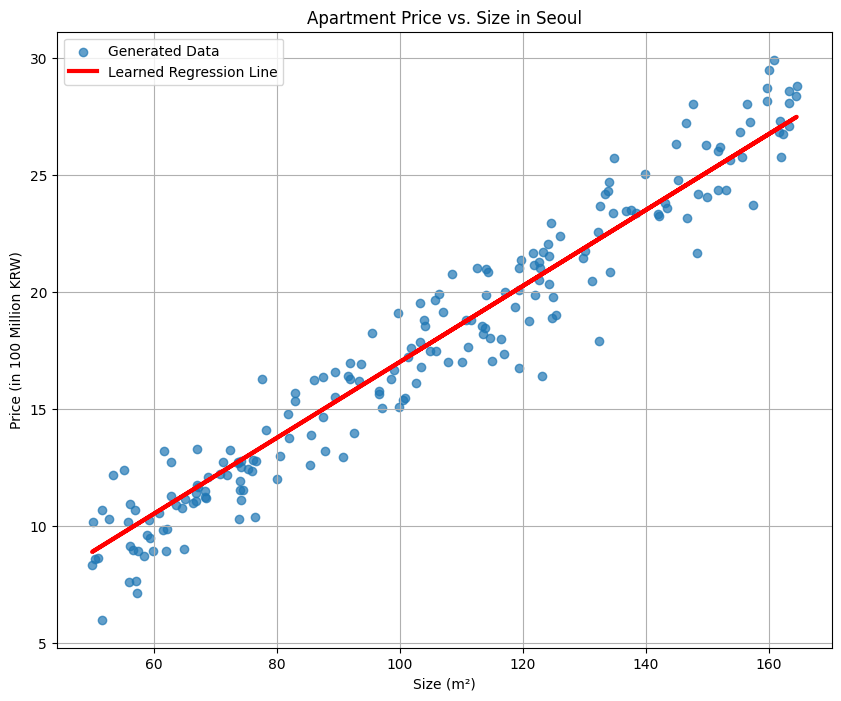

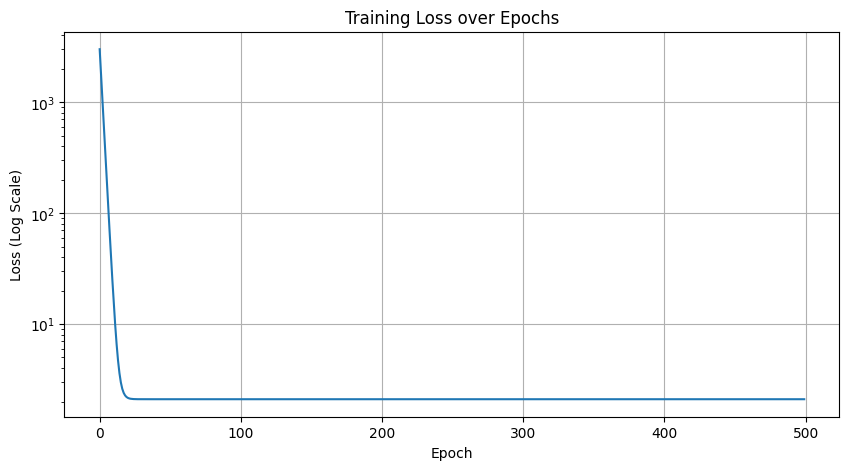


===== Final Learned Parameters =====
Weight (W): 0.1623
Bias (b):   0.7792


In [1]:
import numpy as np
import torch
import torch.nn as nn # For neural network operations
import torch.optim as optim # For optimization functions
import torch.nn.init as init # For tensor initialization
import matplotlib.pyplot as plt

# ====================== 1. Data Generation ======================
# Set hyperparameters
num_data = 200
num_epoch = 500

# x - feature (apartment size in m^2)
# Generated from a Uniform Distribution between 50 and 165.
x = init.uniform_(torch.Tensor(num_data, 1), 50, 165)

# True underlying linear relationship (y = 0.17x - 0.09)
y = 0.17 * x - 0.09

# Generate noise from a Normal distribution (mean=0, std=1.5)
noise = init.normal_(torch.FloatTensor(num_data, 1), std=1.5)

# y_noise - final target variable with noise added
y_noise = y + noise


# ====================== 2. Model, Loss F., and Optimizer Setup ======================
# Define a simple linear model (1 input feature, 1 output value)
model = nn.Linear(1, 1)

# Loss Function: Mean Squared Error (MSE)
loss_func = nn.MSELoss()

# Optimizer: Stochastic Gradient Descent (SGD)
# A very small learning rate is required due to the large scale of input features.
optimizer = optim.SGD(model.parameters(), lr=1e-5)


# ====================== 3. Model Training ======================
# List to store loss values for each epoch
loss_arr = []

for i in range(num_epoch):
    # Clear previous gradients
    optimizer.zero_grad()

    # Get model prediction for the input data
    output = model(x)

    # Calculate the loss between prediction and actual data
    loss = loss_func(output, y_noise)

    # Backpropagate the loss to calculate gradients
    loss.backward()

    # Update the model's parameters (W, b) based on gradients
    optimizer.step()

    # Store the current loss value
    loss_arr.append(loss.detach().numpy())

    # Print the loss every 50 epochs to monitor training
    if i % 50 == 0:
        print(f"Epoch {i:03d}/{num_epoch} | Loss: {loss.item():.4f}")


# ====================== 4. Visualization ======================
# 4-1. Plotting the final results: data and the learned regression line
plt.figure(figsize=(10, 8))
plt.scatter(x.detach().numpy(), y_noise.detach().numpy(), label='Generated Data', alpha=0.7)

# Draw the line based on the final learned parameters (W and b)
learned_line = model.weight.item() * x + model.bias.item()
plt.plot(x.detach().numpy(), learned_line.detach().numpy(), color='red', linewidth=3, label='Learned Regression Line')

plt.title('Apartment Price vs. Size in Seoul')
plt.xlabel('Size (m²)')
plt.ylabel('Price (in 100 Million KRW)')
plt.legend()
plt.grid(True)
plt.show()


# 4-2. Plotting the training loss curve
plt.figure(figsize=(10, 5))
plt.plot(loss_arr)
plt.yscale('log') # Use a log scale on the y-axis for better visibility
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log Scale)')
plt.grid(True)
plt.show()


# ====================== 5. Final Parameter Check ======================
# Print the final learned Weight (W) and Bias (b)
param_list = list(model.parameters())
print("\n===== Final Learned Parameters =====")
print(f"Weight (W): {param_list[0].item():.4f}")
print(f"Bias (b):   {param_list[1].item():.4f}")

+) 추가
Learning Rate: 1e-5
x 범위가 50~165로 입력값 스케일이 크기 때문에, 손실 함수의 gradient 또한 매우 커진다. 학습률이 높으면 최적점을 찾지 못하고 손실 값이 diverge할 수 있다. 안정적인 학습과 수렴을 위해 의도적으로 매우 작은 학습률을 선택했다.